In [1]:
#Import Libraries
import pandas as pd #CSV handler library
import numpy as np #Advanced arrays
import matplotlib.pyplot as plt # Graph library
#%matplotlib inline

## Classification

- Linear regression model is good but it assumes variable Y is quantitative
- There are times when the response variable is **qualitative**
- Qualitative values are often viewed as categorical or viewed as **classification** 
- The methods used for classification predict the probablity of each category of a qualitative varaible
- Because of this, they behave somewhat similarly to regression methods


- There are many classification techniques or **classifiers**, you might use to predict a qualitative response
- The most 3 most common widely-used classifiers are
    - Logistic Regression
    - Linear Discriminant Analysis
    - K-nearest neighbors
- There are other methods but those methods are a bit more computer-intensive

## Overview of Classification

- Classification problems occur often, even more so than regression problems
- These include examples like:
    - A doctor must know a person conditions who arrives with a set of symptoms that could possibly be attributed to one of three medical conditions
    - An online banking service must be able to determine whether or nota transaction being performed on the site is fraudulent, on the basis of the user’s IP address, past transaction history, and so forth
    - On the basis of DNA sequence data for a number of patients with and without a given disease, a biologist would like to figure out which DNA mutations are deleterious (disease-causing) and which are not
- Just like regression, classification takes in training observation used to build a classifier



- We will illustrate the concept of classification using the **Default** data set
- We need to predict if a person will default
- In real life, the relationship will be not be nearly so strong


<img src="./Figures/Chapter4/4.1a.png" width="600" height="600">
<img src="./Figures/Chapter4/4.1b.png" width="600" height="600">


Shape of CSV:(10000, 5)
   Unnamed: 0 default student      balance        income  default2  student2
0           1      No      No   729.526495  44361.625074         0         0
1           2      No     Yes   817.180407  12106.134700         0         1
2           3      No      No  1073.549164  31767.138947         0         0
3           4      No      No   529.250605  35704.493935         0         0
4           5      No      No   785.655883  38463.495879         0         0


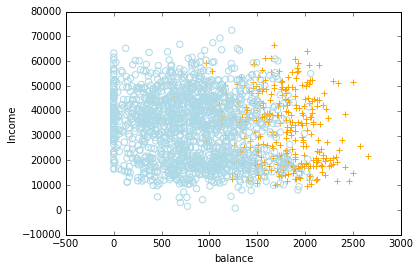

In [15]:
'''
Use of the Default data set,
Predicting whether an individual will default his credit card payment

'''
data = pd.read_csv('Data/Default.csv', index_col=False, header=0)
print("Shape of CSV:{}".format(data.shape))

data['default2'] = data.default.factorize()[0]
data['student2'] = data.student.factorize()[0]
print( data.head(5) )

data_no = data[data.default2 == 0].sample(frac=0.15)

data_yes = data[data.default2 == 1]
data_ = data_no.append(data_yes)


plt.scatter(data_[data_.default == 'Yes'].balance, data_[data_.default == 'Yes'].income, s=40, c='orange', marker='+',
            linewidths=1)
plt.scatter(data_[data_.default == 'No'].balance, data_[data_.default == 'No'].income, s=40, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='none')
plt.xlabel('balance'); plt.ylabel('Income');
plt.show()

## Why Not Linear Regression?

- Linear regression is not appropriate in the case of a qualitative response
- Using least squares to fit a linear regression model to predict $Y$ implies an ordering on the outcomes
- Even if there is a natural ordering of the classifications, the gap between them implies that they are similar in every gap
- If a _binary_ response, the situation is better

## Logisitic Regression

- Consider the **Default** data set, where the response **default** is either **yes** or **no**
- Logistic regression models the probability that $Y$ belongs to a particular category

<img src="./Figures/Chapter4/4.2.png" width="600" height="600">

- The probability of **default** given **balance**  can be writtern as $Pr(default = Yes | balance)$
- This probability will range between 0 and 1

### Logistic Model

- How should we model $p(X) = Pr( Y = \fract{1}{X} )$?
- In linear regression the model to represent the probabilities is $p(X) = \beta_0 + \beta_1 X$
- We must model $p(X)$ using a function that outputs between 0 and 1 for all values of X
- A function used is the **logistic function**

$$ p(X) = \frac{e^{\beta_0 + \beta_1X}}{1+e^{\beta_0+\beta_1 X}}$$

- To fit the model, we use a method called **maximum likelihood**
- A logistic function will always produce an S-shaped curve this form 
- This form is the same as

$$\frac{ p(X) }{1 - p(X)} = e^{\beta_0 + \beta_1 X}$$

- The left side side of the formula is called the _odds_ can take any value between $0$ and $\infty$
- This can be further improved by 
$log(\frac{ p(X) }{ 1 - p(X) } = \beta_0 + \beta_1 X$
- The left-hand side is now called the __log-odds__ or __logit__ 

### Estimating the Regression Coefficients

- Just like linear regression, we must find tthe coeffcients
- A function used for that is **likelihood function**
$l(\beta_0, \beta_1) = \Pi_{i:y_i =1}p(x_i) \Pi_{i':y_i' = 0}(1 - p(x_{i'}))$